In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns ; sns.set()
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm

In [4]:
df=pd.read_excel('C:/Users/hp/Downloads/Sales_Data.xlsx')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,43155,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,43227,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,43282,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,43337,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,43401,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [6]:
df.duplicated().count()

2747

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
ORDERDATE,2747.0,43598.914088,230.231295,43106.00,43412.000,43640.00,43786.000,43982.00
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [8]:
df.shape

(2747, 20)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


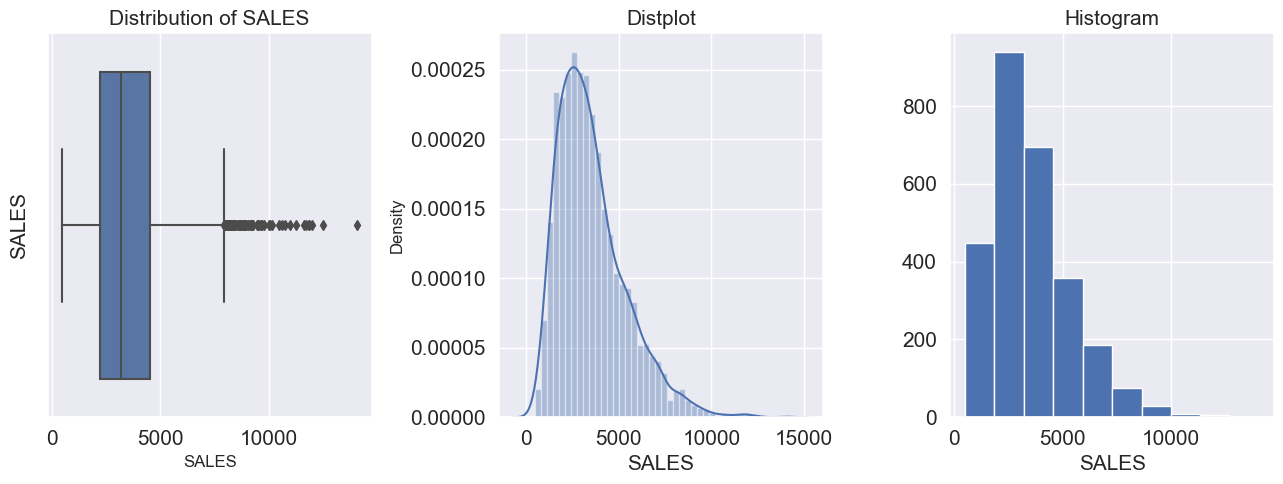

In [9]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='SALES',data=df,orient='V',ax=ax1)
ax1.set_ylabel('SALES', fontsize=15)
ax1.set_title('Distribution of SALES', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['SALES'],ax=ax2 )
ax2.set_xlabel('SALES', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['SALES'])
ax3.set_xlabel('SALES', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


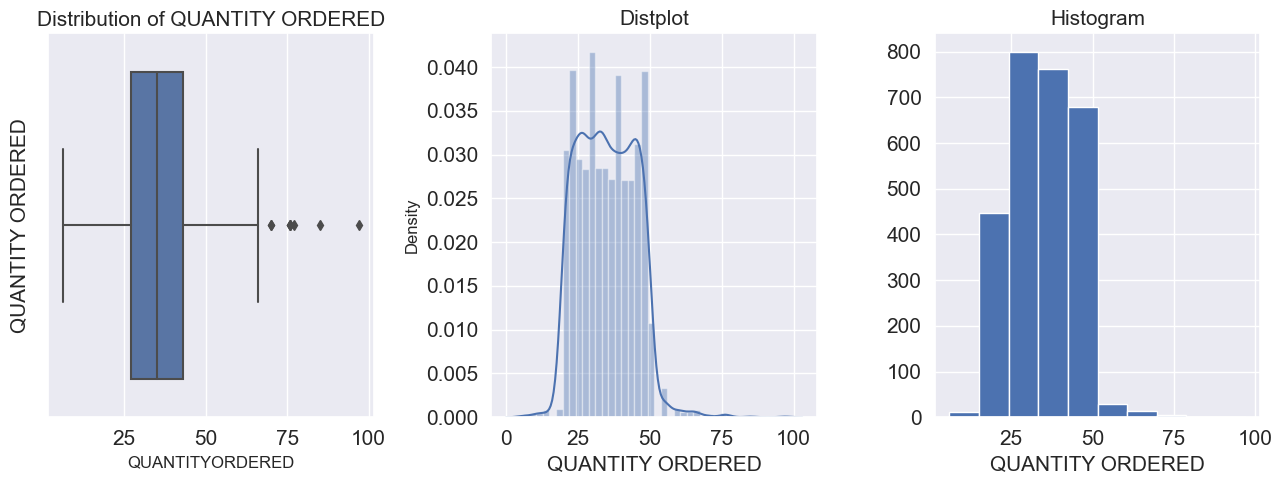

In [10]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='QUANTITYORDERED',data=df,orient='V',ax=ax1)
ax1.set_ylabel('QUANTITY ORDERED', fontsize=15)
ax1.set_title('Distribution of QUANTITY ORDERED', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['QUANTITYORDERED'],ax=ax2 )
ax2.set_xlabel('QUANTITY ORDERED', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['QUANTITYORDERED'])
ax3.set_xlabel('QUANTITY ORDERED', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


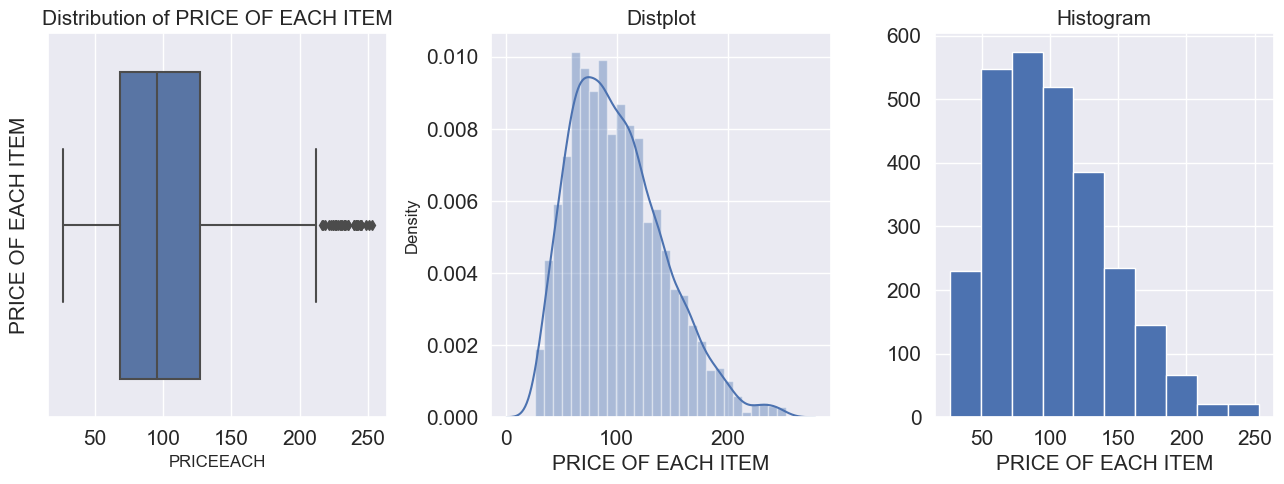

In [11]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='PRICEEACH',data=df,orient='V',ax=ax1)
ax1.set_ylabel('PRICE OF EACH ITEM', fontsize=15)
ax1.set_title('Distribution of PRICE OF EACH ITEM', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['PRICEEACH'],ax=ax2 )
ax2.set_xlabel('PRICE OF EACH ITEM', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['PRICEEACH'])
ax3.set_xlabel('PRICE OF EACH ITEM', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


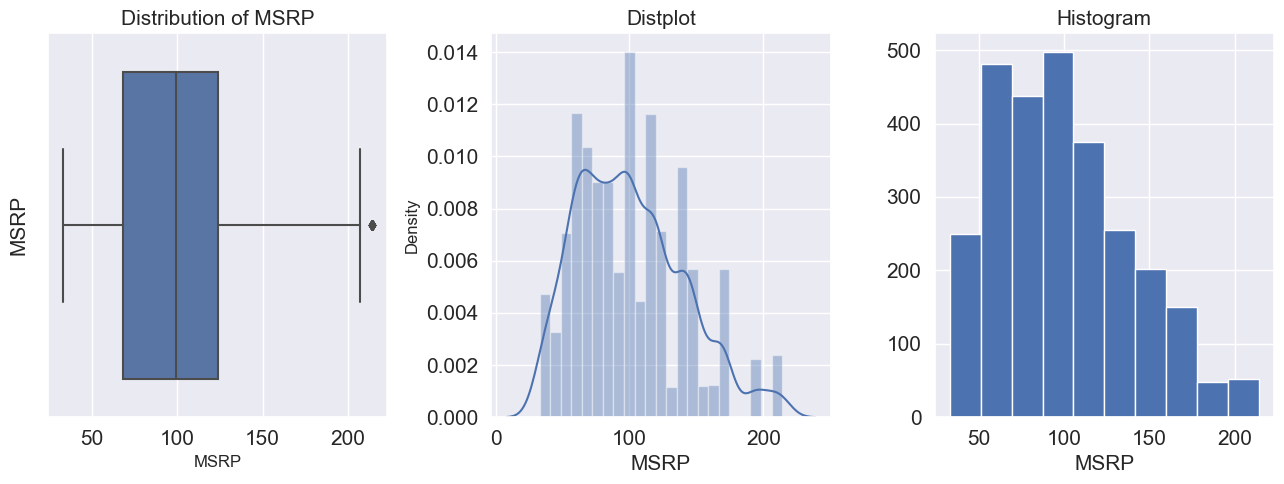

In [12]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))


#boxplot
sns.boxplot(x='MSRP',data=df,orient='V',ax=ax1)
ax1.set_ylabel('MSRP', fontsize=15)
ax1.set_title('Distribution of MSRP', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['MSRP'],ax=ax2 )
ax2.set_xlabel('MSRP', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['MSRP'])
ax3.set_xlabel('MSRP', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


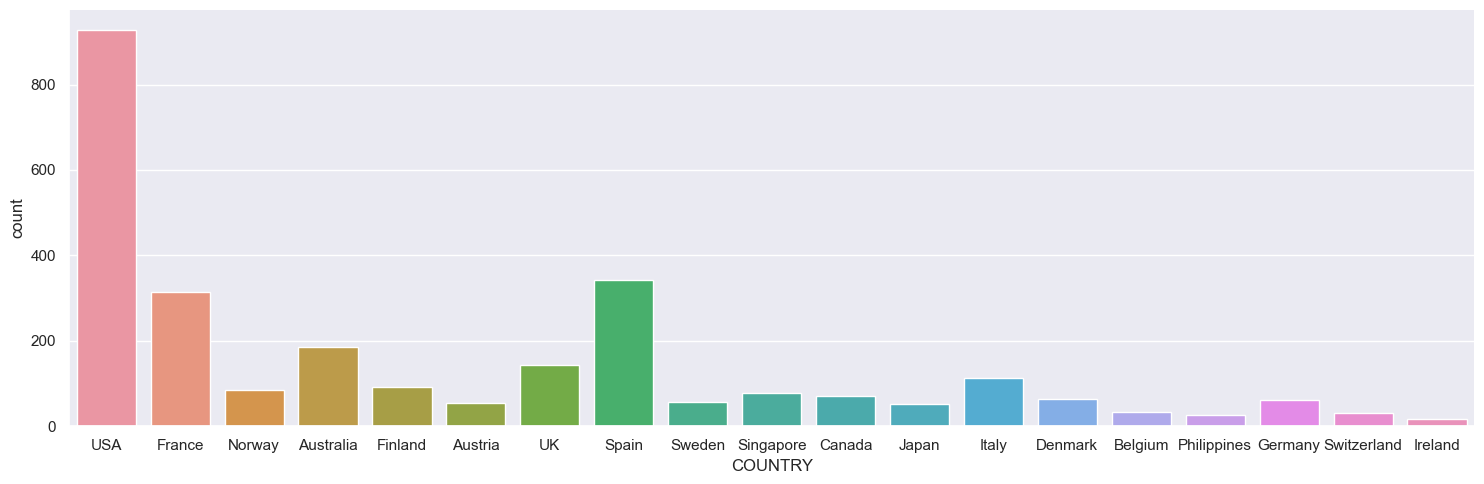

In [13]:
sns.catplot('COUNTRY', data=df, kind='count',aspect=3)

In [14]:
df.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,0.982862,-0.251476,-0.013910
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,0.059549,-0.021923,0.020551
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.006688,-0.397092,0.778393
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,-0.045635,0.046615,-0.020956
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,0.030891,-0.334274,0.634849
ORDERDATE,0.982862,0.059549,-0.006688,-0.045635,0.030891,1.000000,-0.252259,-0.016465
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397092,0.046615,-0.334274,-0.252259,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.016465,-0.524285,1.000000


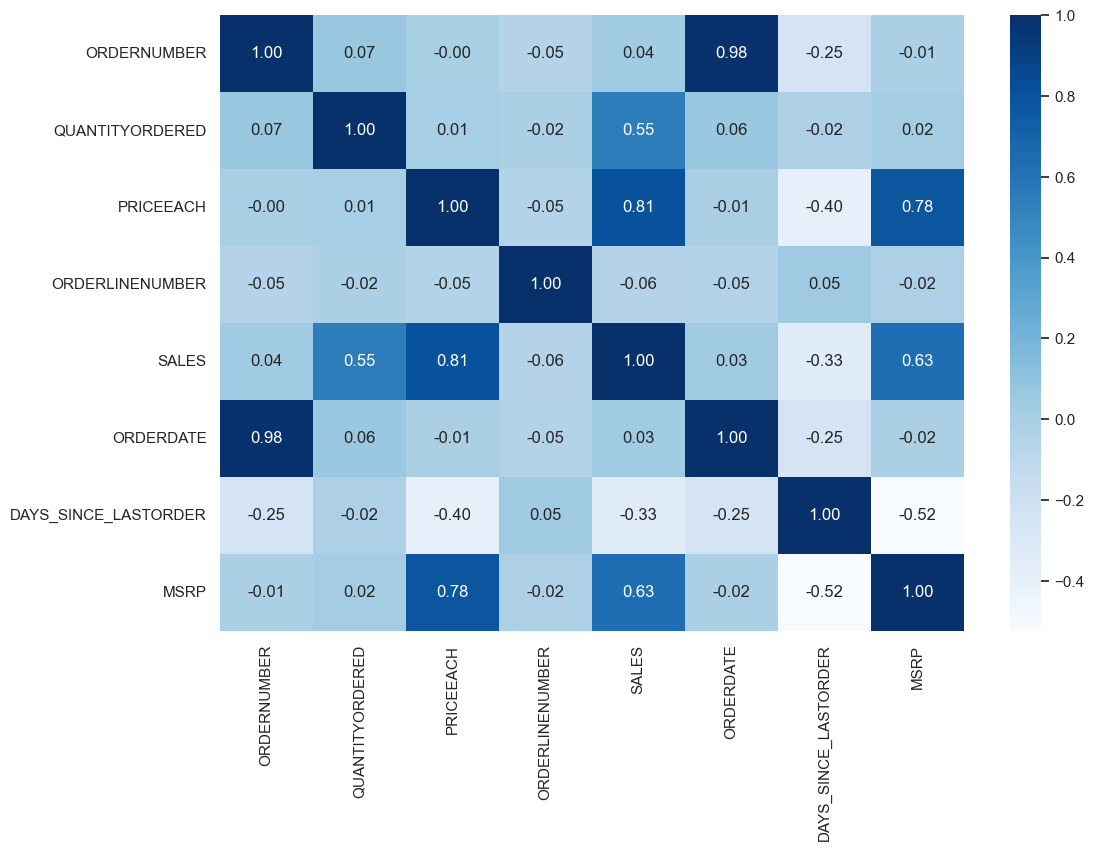

In [15]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues',fmt = '.2f');

In [16]:
corr_mat = df.corr(method='pearson')
sorted_mat = corr_mat.unstack().sort_values()
print(sorted_mat)

DAYS_SINCE_LASTORDER  MSRP                   -0.524285
MSRP                  DAYS_SINCE_LASTORDER   -0.524285
DAYS_SINCE_LASTORDER  PRICEEACH              -0.397092
PRICEEACH             DAYS_SINCE_LASTORDER   -0.397092
DAYS_SINCE_LASTORDER  SALES                  -0.334274
                                                ...   
ORDERLINENUMBER       ORDERLINENUMBER         1.000000
PRICEEACH             PRICEEACH               1.000000
QUANTITYORDERED       QUANTITYORDERED         1.000000
DAYS_SINCE_LASTORDER  DAYS_SINCE_LASTORDER    1.000000
MSRP                  MSRP                    1.000000
Length: 64, dtype: float64


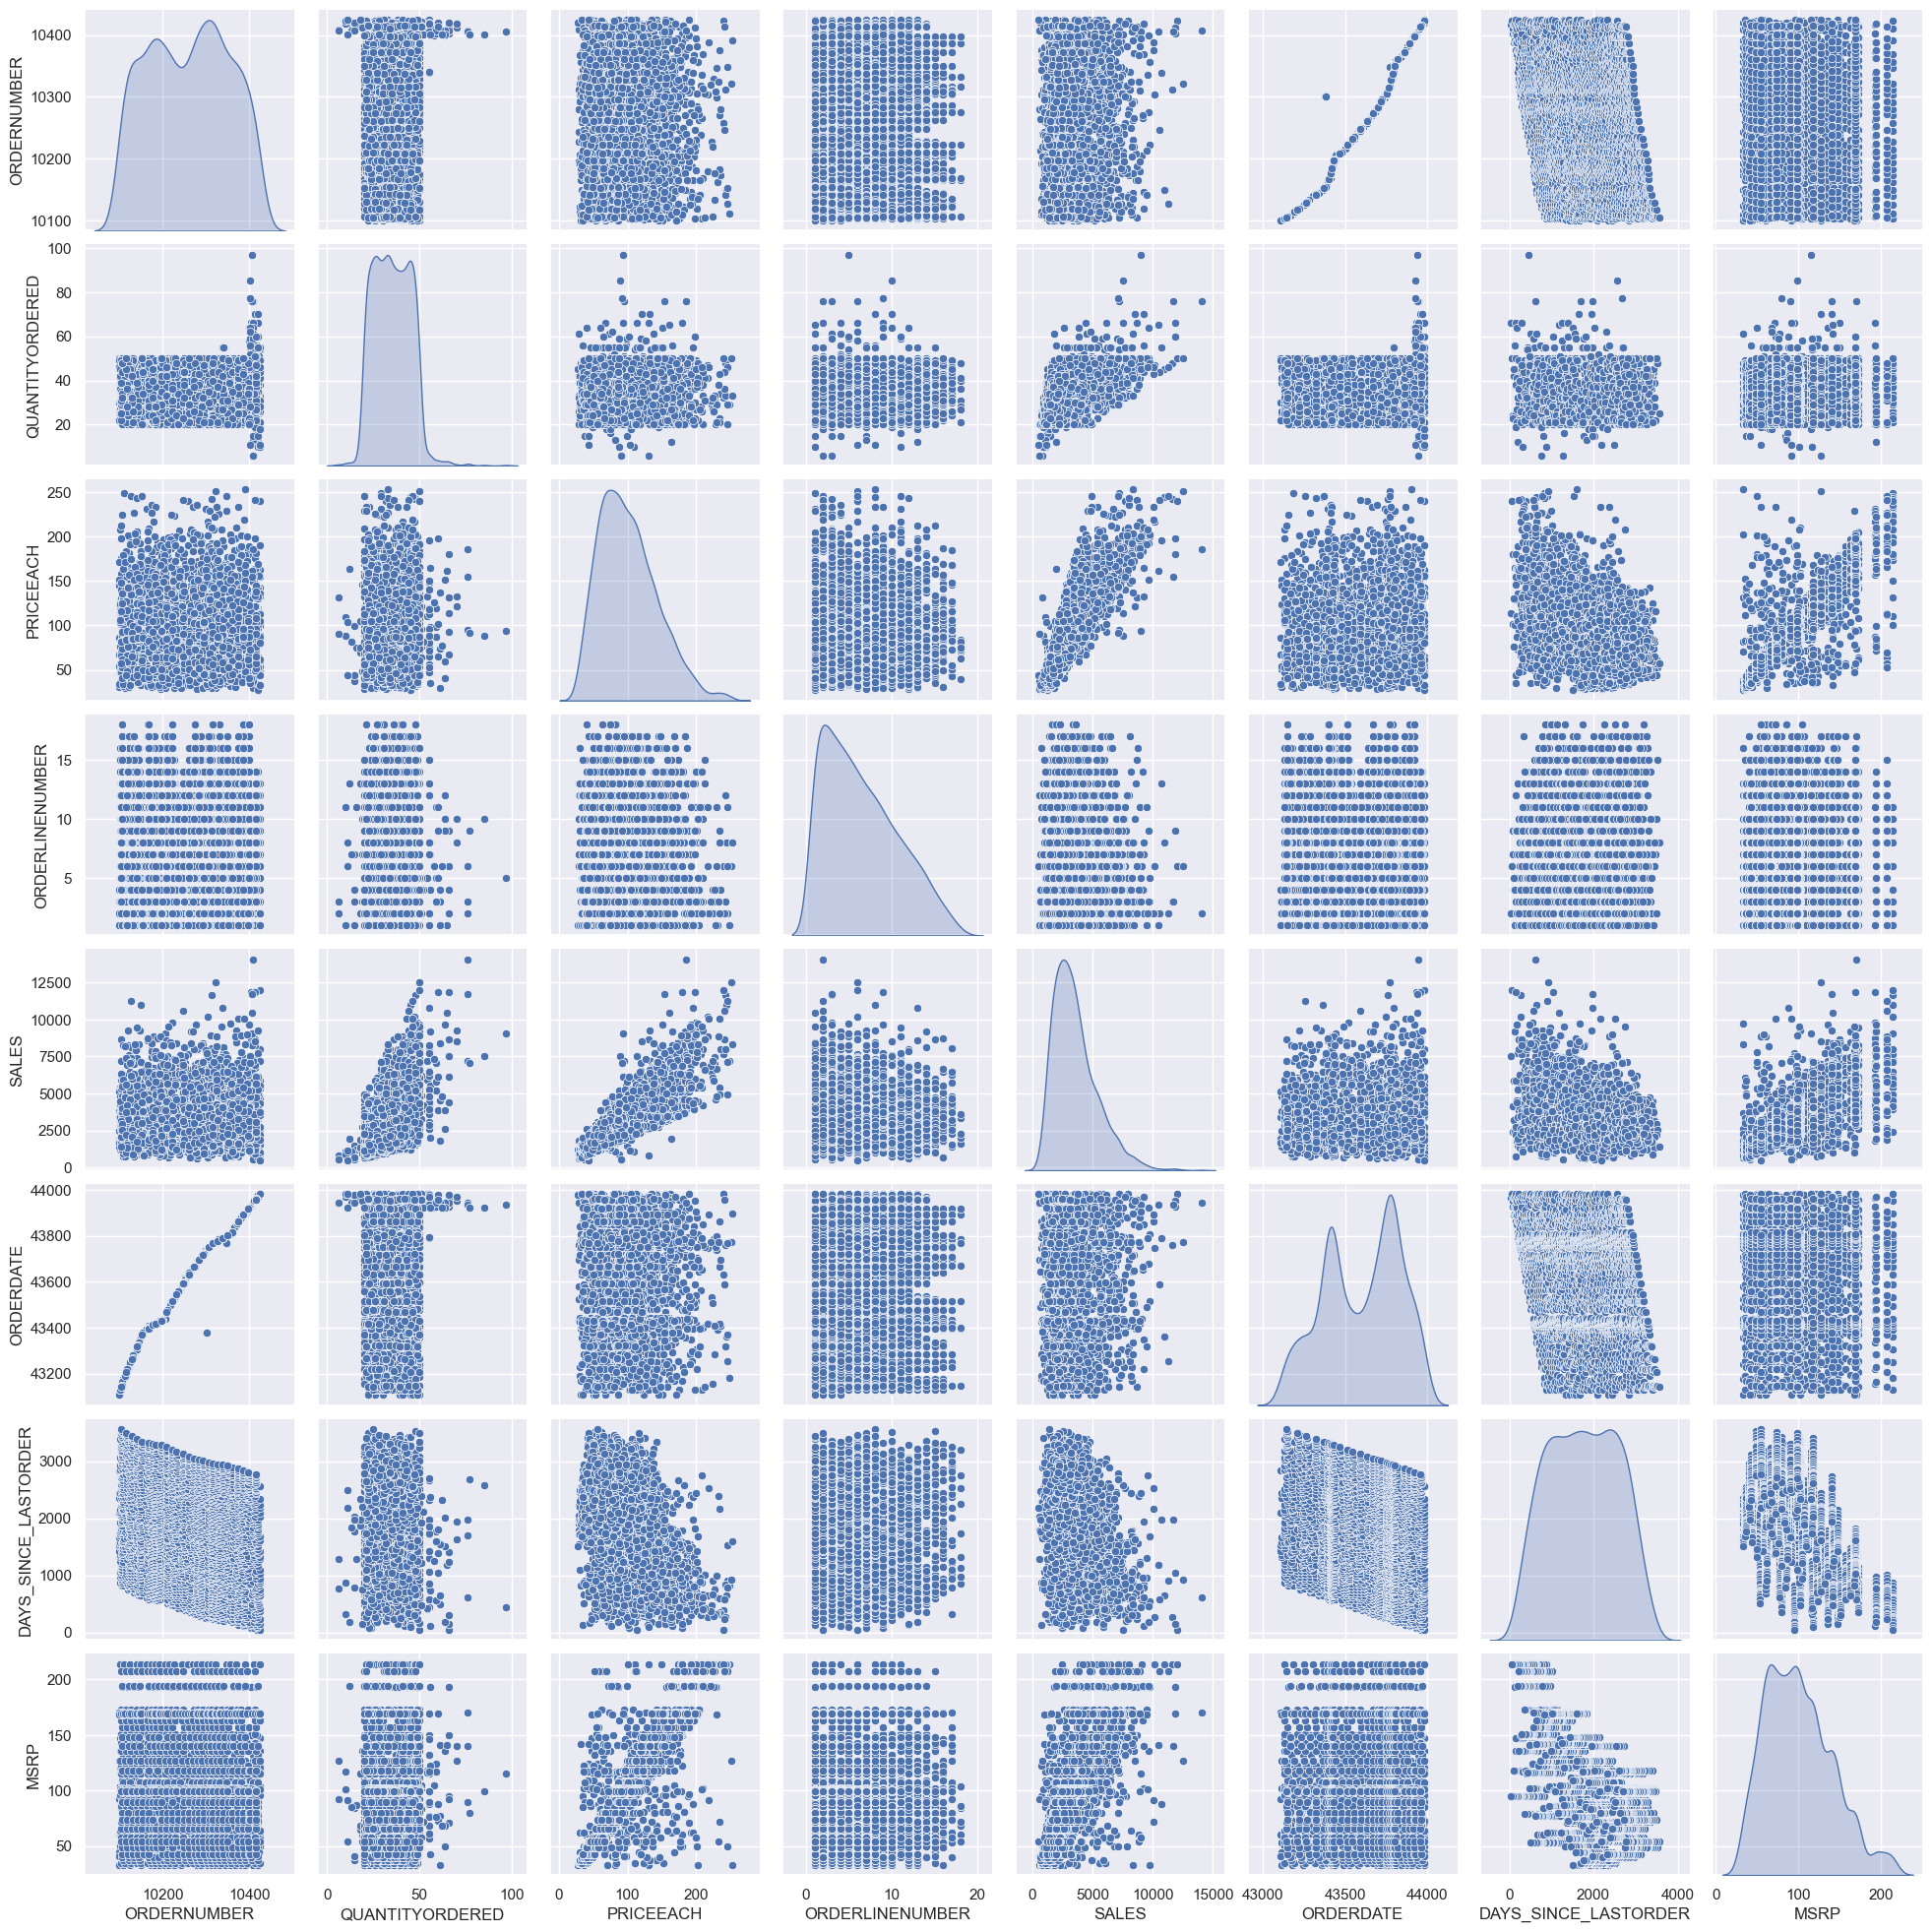

In [17]:
#Visualization of corelation.
sns.pairplot(df,diag_kind='kde');